# Initial Imports & Setup

In [17]:
import pandas as pd
import numpy as np
#import holoviews as hv
#hv.extension('bokeh')
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["font.family"] = "Adobe Gothic Std"

# Importing Data into Dataframe

Still working on whether to index or not. Maybe all columns should be data for now. 

In [18]:
files = glob.glob('./data/*.csv')

df = pd.DataFrame()
for file in files:
    filedf = pd.read_csv(file,
                        usecols=["NAME","Metricname","SeenNum","SeenDenom"])
    # Prettier Names
    filedf = filedf.rename(columns={'NAME': 'MeridiosName',
                                    'Metricname': 'Metric',
                                    'SeenNum': 'Numerator', 
                                    'SeenDenom': 'Denominator'})
    filename_parts = file[7:-4].split(' ')
    # 0 Padded Dates with Dots. 03.15.2018
    if (len(str(filename_parts[0])) is 10):
        filedf['Date'] = datetime.datetime.strptime(filename_parts[0], "%m.%d.%Y")
        filedf['Percentage'] = filedf['Numerator'] / filedf['Denominator'] * 100
        #Not sure how to handle data vs index
        #filedf.set_index(['MeridiosName', 'Metric', 'Date'], inplace=True)
        df = df.append(filedf) 
    else:
        print("CSV Data File doesn't have Zero-Padded Date at beginning.")
#df.dtypes
#df.head()
#df.info()
#df.describe()
#df.columns
df.Metric.unique()

array(['AAA Screening',
       'Advance Directive - Patients >55yrs w/Advance Directive ',
       'Blood Pressure NOT Controlled  >140/90 mm Hg    ', 'Chlamydia',
       'Colorectal Cancer Screening (Colonoscopy/Sigmoid/FIT test)',
       'Diabetes Care Gaps ', 'DM PTS 40 to 75 w/STATIN',
       'DM PTS 55-75 w/ACE/ARB', 'Eye exam', 'Foot Exam',
       'HgbA1c < 7.0                     ',
       'HgbA1c NOT > 9.0 (poor control) ',
       'Hypertension Patients 18-59 years BP <140/90',
       'Hypertension Patients over 18 BP <140/90',
       'Hypertension Patients over 59 years BP <150/90',
       'Mammogram Ages 52 -74', 'Nephropathy Assessment',
       'Pap Smear Report', 'Pneumovax - DM patients w/current pneumovax',
       'Pneumovax - Patients Age>65 w/current pneumovax',
       'Pneumovax - Smokers w/current pneumovax',
       'Smoking Cessation Advice or Treatment ',
       'Statin patients with LDL in the past 365 days',
       'TD - Patients >18yrs with TD in last 10 years', '

# Understanding the data

Indexes need to be unique so a heirarchical index of Name, Metric and Date would be unique. 

Will need to use GroupBy function of Pandas

### Lookups:

* what clinic does a provider belong to? 
* Person vs Clinic
* What's the Provider's 'Real Name' 
* What's a short name for the Metric?
* What's a target percentage for a measure

### Cleanups:

* Percentage can be rounded to 2 decimal points (but why throw out the data on the import?)


### Validations:

* Does Data include new MeridiosName, New Metric items? (Has the underlying report changed?)



/Users/jonathan/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


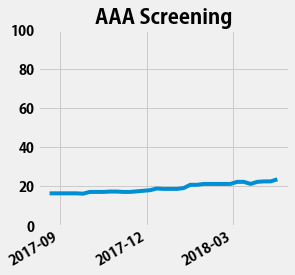

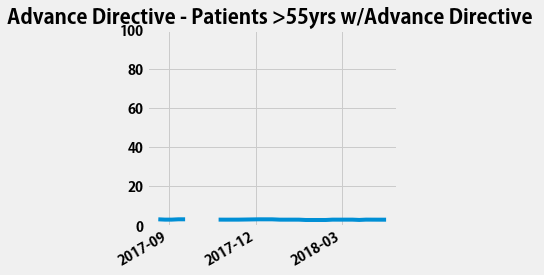

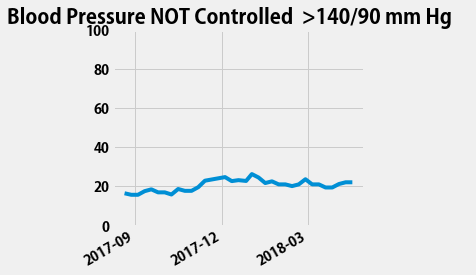

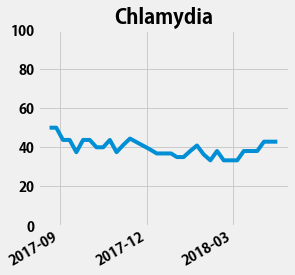

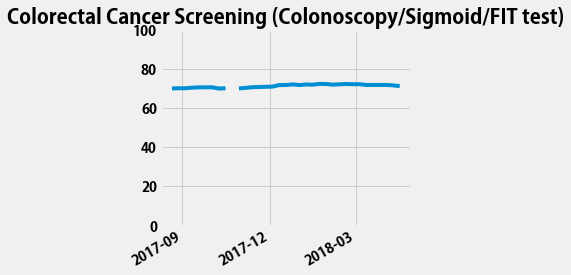

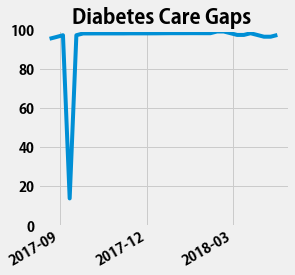

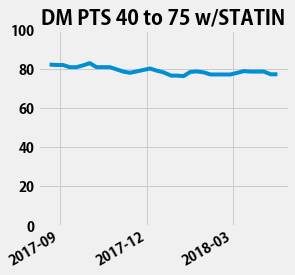

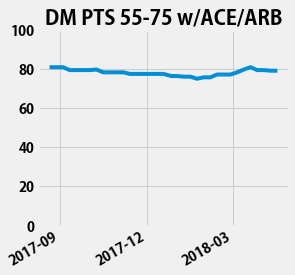

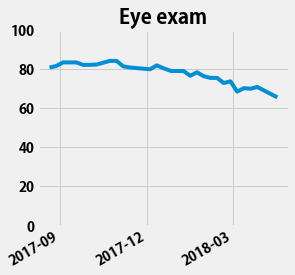

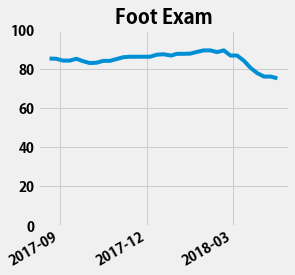

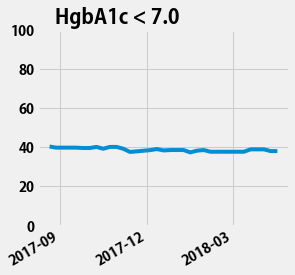

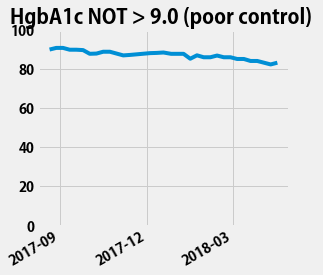

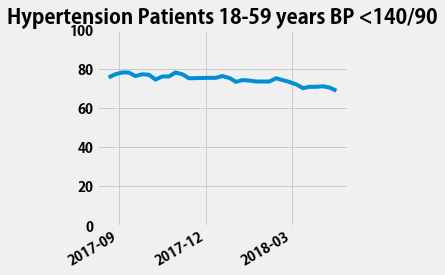

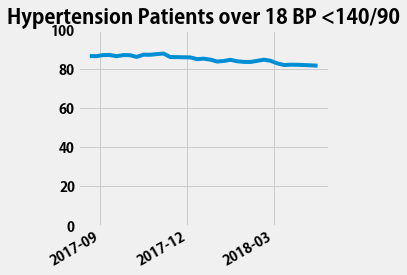

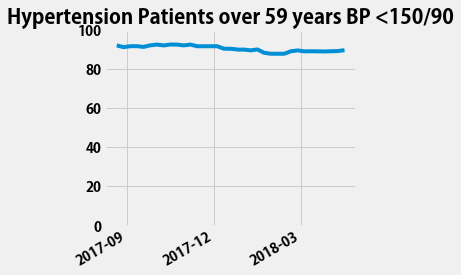

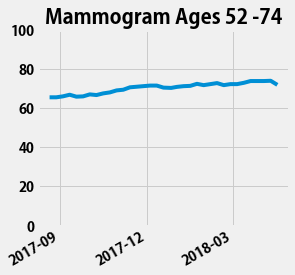

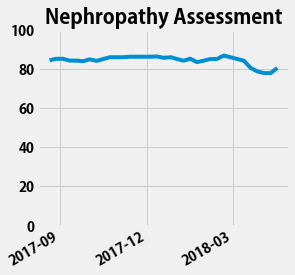

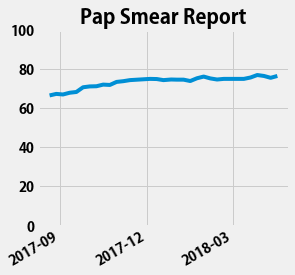

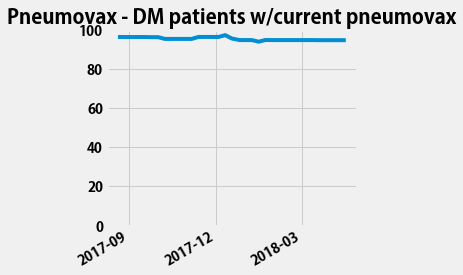

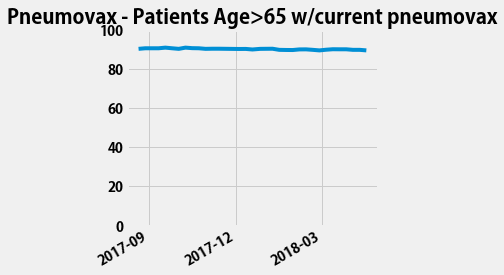

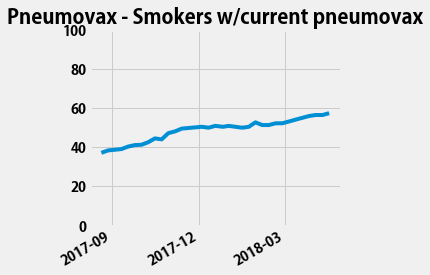

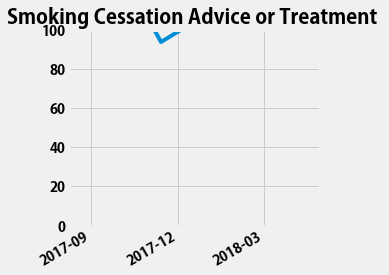

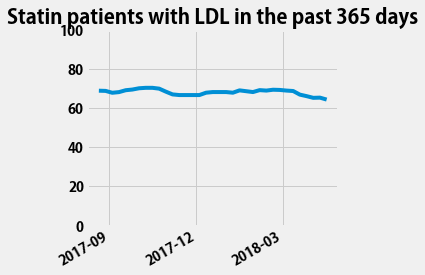

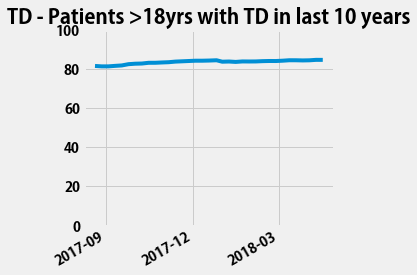

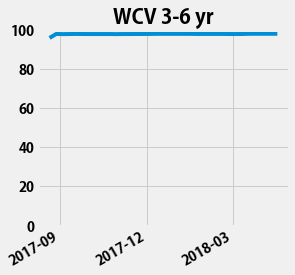

In [28]:
Provider = df[df['MeridiosName'] == 'Ploudre MD, Jonathan']
for number, metric in enumerate(Provider.Metric.unique()):
    ProviderMetric = Provider[Provider['Metric'] == metric]
    ax = ProviderMetric.plot(x="Date", y="Percentage", title=metric, legend=False, ylim=(0,100), figsize=(4,4))
    ax.set_xlabel("")
    # Let's Do ever third tick mark (quarters)
    ax.set_xticks(ax.get_xticks()[::3])
    fig = ax.get_figure()
    fig.savefig(str(number) + ".svg", dpi=96)
    